# 1.1 - Handling Missing Values in EPC Data (Domestic Buildings)

<hr style="border:2px solid black">

# Outline <a id='index'></a>
1. [Introduction](#1)
1. [Data Visualization and Cleaning](#2)
    * [2.1 Continuous Data Analysis](#2.1)
    * [2.2 Categorical Data Analysis](#2.2)
    * [2.3 Data Binning Techniques](#2.3)
1. [Conclusion](#3)
1. [References](#4)

<hr style="border:2px solid black">

# 1. Introduction [^](#index) <a name="1"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;All data from the Energy Performance Certificate (EPC)
32 boroughs in London need to be cleaned from NAN values as input for the machine learning models [1].
In this case, there are two data types: categorical and continuous. 
Since the models will not accept any NAN or null values, any cells that have NAN values will
be removed for categorical data while NAN values in continous data will be replaced.
 First, each feature is visualised using the histogram.
Then, features with NAN values will be removed after merging with the London Building Stock Model (LBSM) to avoid bias [2].
The cleaning process for domestic buildings is not the same as for public building since domestic building has more data
compared to public buildings. Therefore, NAN values are remove to avoid bias when estimated energy consumption
between domestic and public buildings are compared.
It is started by reading the CSV file provided.
Then,  repetitive columns are dropped. Finally, before we started 
the cleaning process, we removed columns with NAN values of more than 25% as
they were insignificant and may affect the model's performance later.<div>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:

dom= '/home/ffs223/Downloads/GHGs_coding/DOM_Main code/Job Portfolio/MRES_Project/0.1_DOM_1423_32B.csv'
dom_df=pd.read_csv(dom)
dom_df

,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,BUILDING_REFERENCE_NUMBER,POSTCODE,TENURE,UPRN,UPRN_SOURCE,PROPERTY_TYPE,...,MAINHEAT_ENV_EFF,MAINHEAT_ENERGY_EFF.1,ROOF_ENV_EFF,ROOF_ENERGY_EFF,ROOF_DESCRIPTION.1,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,HEATING_COST_CURRENT,LIGHTING_COST_CURRENT
0,20e1bbd4c3e619b7d333af256de02e44169ee228a297f5...,209a Green Street,Forest Gate,NaN,10003607682,E7 8LL,Rented (private),1.000899e+10,Energy Assessor,Flat,...,Good,Good,NaN,NaN,(another dwelling above),From main system,Good,Good,374.0,47.0
1,188af6dacb4137e02fd8964966ec981f4c3f5c4ea6b700...,Flat 97,Opal Court,172 High Street,10003516387,E15 2GB,Rented (private),1.009033e+10,Energy Assessor,Flat,...,Good,Good,Good,Good,"Flat, insulated (assumed)",Community scheme,Good,Good,258.0,119.0
2,189637da5cc47f86d824c37663194e1f2a28e3ee5654b1...,34 Mitcham Road,NaN,NaN,10003448733,E6 3LU,Rented (private),4.605080e+07,Energy Assessor,House,...,Good,Good,Good,Good,"Pitched, 270 mm loft insulation",From main system,Good,Good,675.0,84.0
3,1897b2921445e4861204269cd4cd66bf7aabb8c3a79b52...,Flat 35,David Lee Point,Leather Gardens,10003510192,E15 3LE,Rented (social),4.604471e+07,Energy Assessor,Flat,...,Good,Good,NaN,NaN,(another dwelling above),From main system,Good,Good,297.0,70.0
4,189c0e87dc613023b1a9e42416645b96333e2893ae2371...,Flat 42,Avondale Court,Liverpool Road,10003511750,E16 4LX,Owner-occupied,1.000901e+10,Energy Assessor,Flat,...,Good,Good,NaN,NaN,(another dwelling above),From main system,Good,Good,289.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422546,010999bf35108420464e5ea48e40b9a624492ceae6e69d...,Flat 9,Copperfield Court,1 Village Way,10002935381,IG6 1RA,Owner-occupied,1.003491e+10,Energy Assessor,Flat,...,Good,Good,NaN,NaN,(another dwelling above),From main system,Good,Good,311.0,101.0
2422547,00fede183e28ba0b6e3868de003f227fdfa0a7b616c0ba...,251 Maybank Road,NaN,NaN,10002733331,E18 1ER,Owner-occupied,1.000223e+11,Energy Assessor,House,...,Good,Good,Very Poor,Very Poor,"Pitched, no insulation (assumed)",From main system,Good,Good,676.0,65.0
2422548,00cad7ab89e5159a0864b4de6e2faad8e2c07307ad9c3b...,29c Grosvenor Road,Wanstead,NaN,10002617564,E11 2EW,Owner-occupied,1.003491e+10,Energy Assessor,Flat,...,Good,Good,NaN,NaN,(another dwelling above),From main system,Good,Good,405.0,44.0
2422549,006da7fc42ee9e7c3c8d023ad6eadda2a506fc1e811a1c...,18 Palmer Road,NaN,NaN,10002625957,RM8 1TD,Owner-occupied,1.000222e+11,Energy Assessor,House,...,Good,Good,Good,Good,"Pitched, 150 mm loft insulation",From main system,Good,Good,263.0,53.0


<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;Initially, there were 59 columns for EPC with various features
such as socioeconomic, spatial, energy efficiency, and emission. Socioeconomic features include heating and
lighting costs, while spatial features include glazed area, main fuel, windows description, roof description,
floor description, total floor area, construction age band, multi-glaze proportion, etc. In addition, 
energy efficiency and emission features are windows energy efficiency, CO2 emission per floor area, CO2 emission current, environmental impact current and others. 
Meanwhile, other columns such as Unique Property Reference Number (UPRN) AND LMK-Key are the features
as an identification number for a property.<div>

In [3]:
drop=['MAINHEAT_ENERGY_EFF.1','ROOF_DESCRIPTION.1']#Repetitive columns
dom_df.drop(columns=drop, inplace=True)

In [4]:
#dom_df.drop('Unnamed: 0', axis=1, inplace=True)
dom_df.isnull().sum()


LMK_KEY                                0
ADDRESS1                               0
ADDRESS2                         1124093
ADDRESS3                         2117611
BUILDING_REFERENCE_NUMBER              0
POSTCODE                               0
TENURE                                 0
UPRN                              125223
UPRN_SOURCE                       125223
PROPERTY_TYPE                          0
BUILT_FORM                          1334
year                                   0
INSPECTION_DATE                        0
CO2_EMISSIONS_CURRENT                  0
CURRENT_ENERGY_RATING                  0
CURRENT_ENERGY_EFFICIENCY              0
ENERGY_CONSUMPTION_CURRENT             0
CO2_EMISS_CURR_PER_FLOOR_AREA          0
TOTAL_FLOOR_AREA                       0
ENERGY_TARIFF                        103
MAINS_GAS_FLAG                    371627
FLOOR_LEVEL                       272696
MULTI_GLAZE_PROPORTION            259856
TRANSACTION_TYPE                       0
GLAZED_AREA     

In [17]:
def plot_nan(nan_df, total_rows, title, colour=None):
    """
    Plot the bar graph for NAN features.
    
    Parameters:
    - nan_df : DataFrame that contains columns with NaN counts.
    - total_rows : Total number of rows from EPC.
    - title : Title for the bar graph.
    - colour : Color of the bar graph (optional).
    """

    # Calculate the percentage of NaN values
    nan_df['NaN_%'] = (nan_df['NaN_Count'] / total_rows) * 100

    # Plotting
    plt.figure(figsize=(5, 3), dpi=500)
    bars = plt.barh(nan_df['Column'], nan_df['NaN_%'], color=colour)
    plt.xlabel('Percentage of NaN values', fontsize=8)
    plt.title(title, fontsize=10)
    plt.grid(axis='x')
    plt.yticks(fontsize=5)
    plt.xticks(fontsize=6)

    # Visualize percentage value at the right side of the bar
    for bar in bars:
        w = bar.get_width()
        label = f'{w:.1f}%'
        plt.text(w + 0.5, bar.get_y() + bar.get_height() / 2, label, va='center', fontsize=6, color='black')

    plt.show()


In [18]:
nan= { 
    
'ADDRESS2':1124093,
'ADDRESS3':2117611,
'UPRN':125223,
'UPRN_SOURCE':125223,
'BUILT_FORM':1334,
'ENERGY_TARIFF':103,
'MAINS_GAS_FLAG':371627,
'FLOOR_LEVEL':272696,
'MULTI_GLAZE_PROPORTION':259856,
'GLAZED_AREA':120049,
'EXTENSION_COUNT':371627,
'NUMBER_HABITABLE_ROOMS':371627,
'NUMBER_HEATED_ROOMS':371627,
'FLOOR_DESCRIPTION':5,
'WINDOWS_DESCRIPTION':46,
'WINDOWS_ENERGY_EFF':67,
'WINDOWS_ENV_EFF':67,
'WALLS_ENERGY_EFF':6,
'WALLS_ENV_EFF':6,
'ROOF_DESCRIPTION':3,
'MAIN_FUEL':81793,
'FLOOR_HEIGHT':1472564,
'CONSTRUCTION_AGE_BAND':19044,
'SOLAR_WATER_HEATING_FLAG':610129,
'MECHANICAL_VENTILATION':120049,
'UNHEATED_CORRIDOR_LENGTH':1715459,
'MAINHEATC_ENV_EFF':12,
'MAINHEAT_ENERGY_EFF':1,
'MAINHEAT_DESCRIPTION':1,
'MAINHEAT_ENV_EFF':1,
'ROOF_ENV_EFF':1056503,
'ROOF_ENERGY_EFF':1056503,
'HOTWATER_DESCRIPTION':2,
'HOT_WATER_ENERGY_EFF':199,
'HOT_WATER_ENV_EFF':1743

    }

nan_DOM = pd.DataFrame(list(nan.items()), columns=['Column', 'NaN_Count'])#convert nan list into data frame:create col in the df
nan_DOM 

,Column,NaN_Count
0,ADDRESS2,1124093
1,ADDRESS3,2117611
2,UPRN,125223
3,UPRN_SOURCE,125223
4,BUILT_FORM,1334
5,ENERGY_TARIFF,103
6,MAINS_GAS_FLAG,371627
7,FLOOR_LEVEL,272696
8,MULTI_GLAZE_PROPORTION,259856
9,GLAZED_AREA,120049


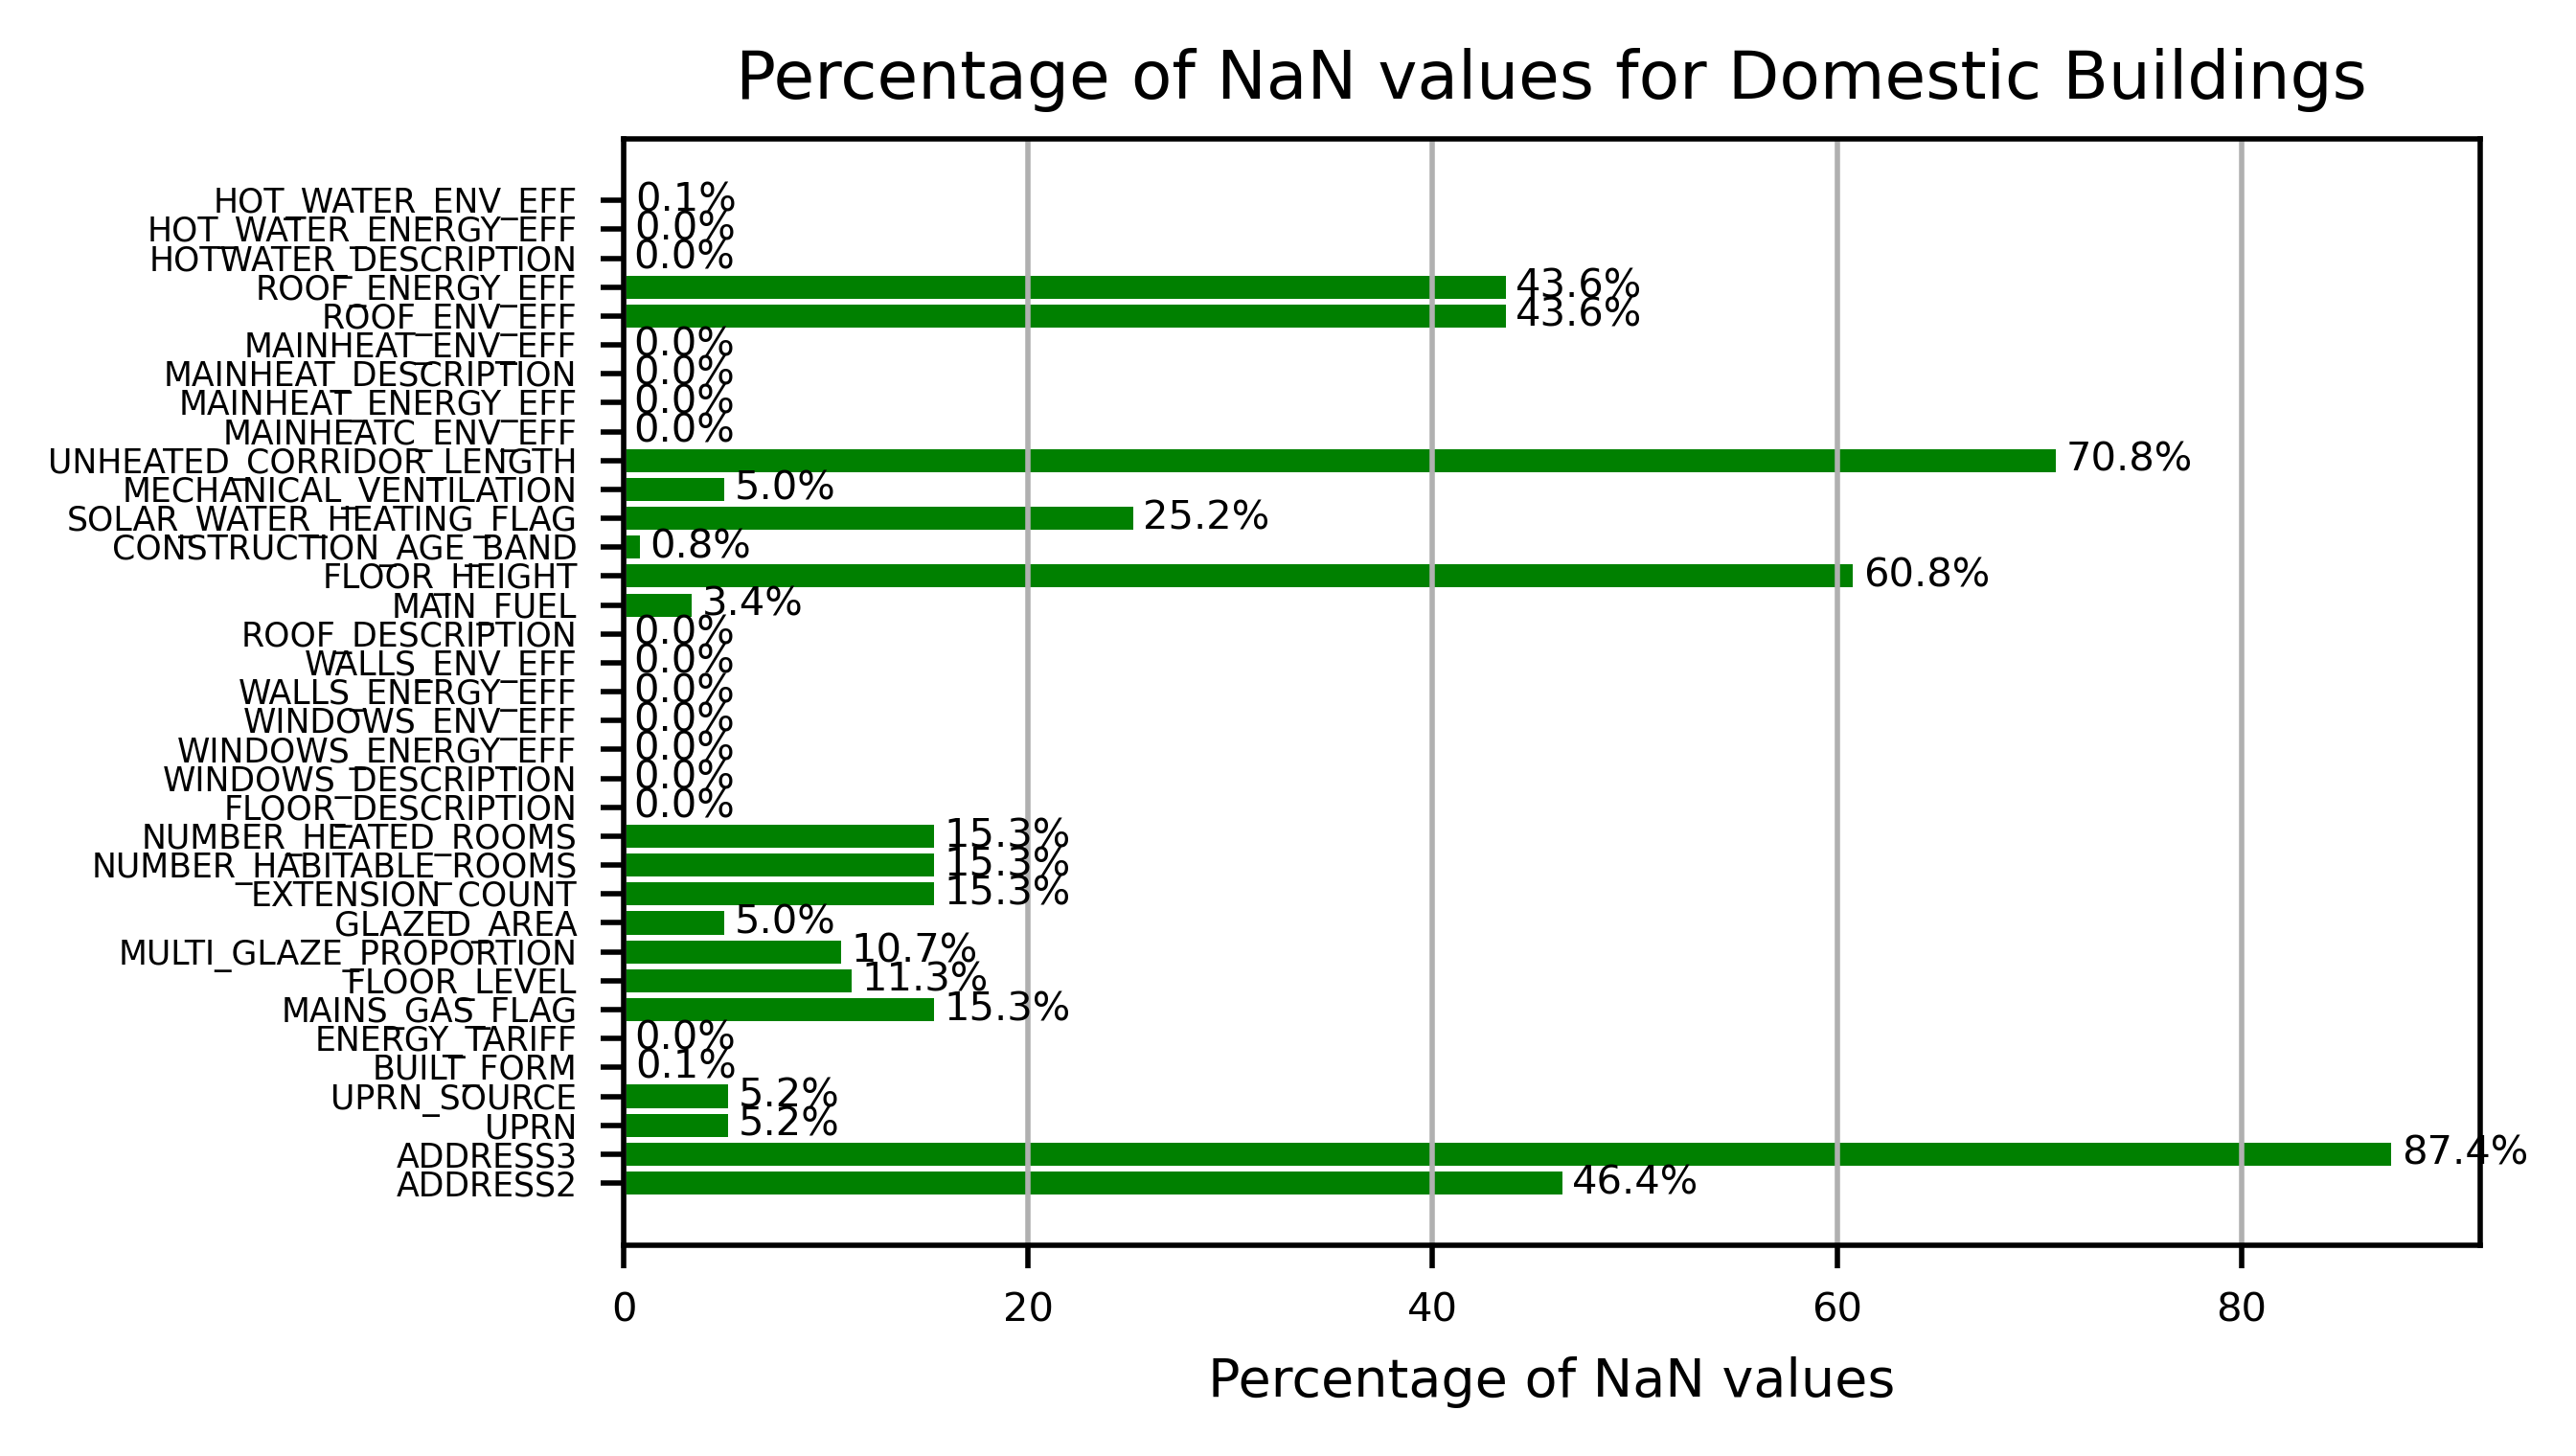

In [19]:
plot_nan(nan_DOM , 2422551, 'Percentage of NaN values for Domestic Buildings','green')

In [20]:
drop_nan=['ROOF_ENV_EFF','ROOF_ENERGY_EFF','UNHEATED_CORRIDOR_LENGTH', 
       'FLOOR_HEIGHT','ADDRESS2','ADDRESS3']
dom_df.drop(columns=drop_nan, inplace=True)# Columns with NAN values more than 25%

# 2. Data Visualization and Cleaning [^](#index) <a name="2"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;There are two types of data in this section. Firstly, for the continuous data, the NAN 
values are replaced
with the average mean value between two values from two cells in between the empty cell.
In contrast, the categorical data is just for visualization as replacing NAN in categorical data.
 This is because it will affect the data after convert to numerical type later.<div>

In [12]:
dom_df.isnull().sum()

LMK_KEY                               0
ADDRESS1                              0
BUILDING_REFERENCE_NUMBER             0
POSTCODE                              0
TENURE                                0
UPRN                             125223
UPRN_SOURCE                      125223
PROPERTY_TYPE                         0
BUILT_FORM                         1334
year                                  0
INSPECTION_DATE                       0
CO2_EMISSIONS_CURRENT                 0
CURRENT_ENERGY_RATING                 0
CURRENT_ENERGY_EFFICIENCY             0
ENERGY_CONSUMPTION_CURRENT            0
CO2_EMISS_CURR_PER_FLOOR_AREA         0
TOTAL_FLOOR_AREA                      0
ENERGY_TARIFF                       103
MAINS_GAS_FLAG                   371627
FLOOR_LEVEL                      272696
MULTI_GLAZE_PROPORTION           259856
TRANSACTION_TYPE                      0
GLAZED_AREA                      120049
EXTENSION_COUNT                  371627
NUMBER_HABITABLE_ROOMS           371627


### 2.1 Continuous Data Analysis [^](#index) <a name="2.1"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
For EPC only MULTI_GLAZE_PROPORTION is a feature with continous data type.

In [21]:
def plot_continous(df, feature, x_rotation=90, x_fontsize=10, edge_color='black', 
                   figsize=(10, 6),colour='purple', x_limits=None,bins=30):
    """
    Plots the distribution for continous data.
    
    Parameters:
    - df :Dataframe from EPC
    - feature: Referring to the columns from EPC
    -x_rotation: 90 degree to display label axis at x-axis
    -x_fontsize: The size of the font for lables at x-axis
    -edge colour:Outline colour for the bar graph
    -figsize: The dimension of the plot, width and height
    -colour: Colour of the bar graph
    -x_limit: Scaling for x_axis
    -bins: Number of intervals in the bar plot
      
    """
    
    freq = (df[feature].value_counts())# Count the frequency of each 
    
    plt.figure(figsize=figsize)
    plt.hist(df[feature], bins=bins, color=colour, edgecolor=edge_color)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    if x_limits is not None:
        plt.xlim(x_limits)
        
    plt.xticks(rotation=x_rotation, fontsize=x_fontsize)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    

In [22]:
def average_mean(df, feature):
    """
    Calculate mean value to replace NAN values.
    
    Parameters:
    - df :Dataframe from EPC
    - feature: Referring to the column from EPC
    """
    
    df[feature] = df[feature].astype(float)
    
    # Loop through the rows of the dataframe
    for i in range(len(df)):
        if pd.isna(df.loc[i, feature]):
            
            # Determine the previous and the next value at the NaN cell
            previous = df.loc[i-1, feature] if i > 0 else np.nan
            next_val = df.loc[i+1, feature] if i < len(df)-1 else np.nan
            
            # Calculate the mean of the previous and next values
            if pd.notna(previous) and pd.notna(next_val):
                mean = (previous + next_val) / 2
            elif pd.notna(previous):
                mean = previous
            elif pd.notna(next_val):
                mean = next_val
            else:
                mean = np.nan
            
            # Replace the NaN cell with the mean value
            df.loc[i, feature] = mean
            
    return df


In [23]:
dom_df['MULTI_GLAZE_PROPORTION'].value_counts()#.idxmax()

MULTI_GLAZE_PROPORTION
100.0    1713435
0.0       216651
50.0       28666
90.0       21934
95.0       16979
          ...   
34.0         147
2.0          105
51.0          92
3.0           77
49.0          71
Name: count, Length: 101, dtype: int64

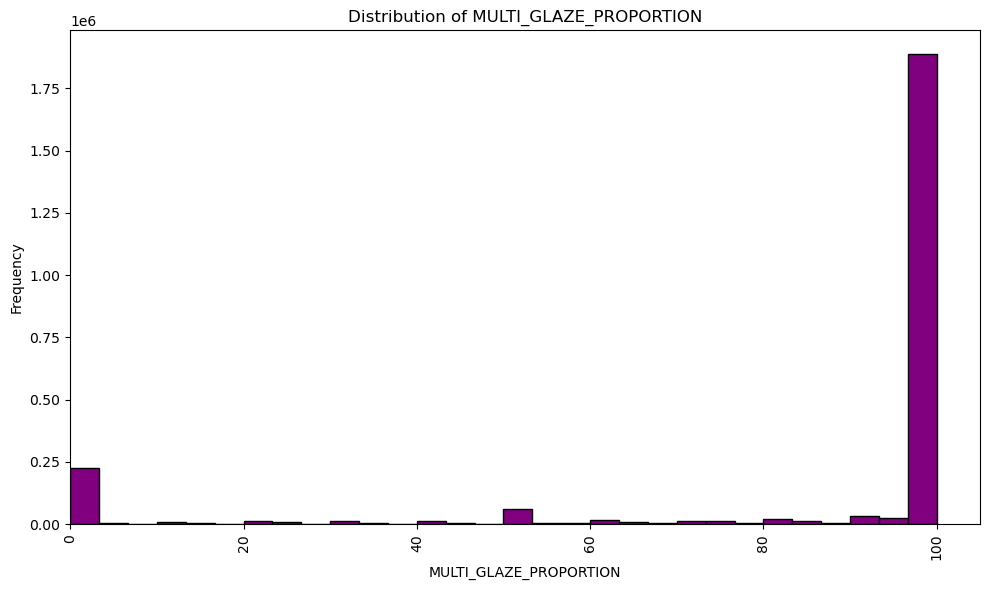

In [24]:
dom_df= average_mean(dom_df, 'MULTI_GLAZE_PROPORTION')
plot_continous(dom_df, 'MULTI_GLAZE_PROPORTION', x_rotation=90, x_fontsize=10, x_limits=(0, 105))

In [25]:
dom_df.isnull().sum()

LMK_KEY                               0
ADDRESS1                              0
BUILDING_REFERENCE_NUMBER             0
POSTCODE                              0
TENURE                                0
UPRN                             125223
UPRN_SOURCE                      125223
PROPERTY_TYPE                         0
BUILT_FORM                         1334
year                                  0
INSPECTION_DATE                       0
CO2_EMISSIONS_CURRENT                 0
CURRENT_ENERGY_RATING                 0
CURRENT_ENERGY_EFFICIENCY             0
ENERGY_CONSUMPTION_CURRENT            0
CO2_EMISS_CURR_PER_FLOOR_AREA         0
TOTAL_FLOOR_AREA                      0
ENERGY_TARIFF                       103
MAINS_GAS_FLAG                   371627
FLOOR_LEVEL                      272696
MULTI_GLAZE_PROPORTION                0
TRANSACTION_TYPE                      0
GLAZED_AREA                      120049
EXTENSION_COUNT                  371627
NUMBER_HABITABLE_ROOMS           371627


In [13]:
df_dom 

,LMK_KEY,ADDRESS1,BUILDING_REFERENCE_NUMBER,POSTCODE,TENURE,UPRN,UPRN_SOURCE,PROPERTY_TYPE,BUILT_FORM,year,...,LIGHTING_DESCRIPTION,MAINHEATC_ENV_EFF,MAINHEAT_ENERGY_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENV_EFF,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,HEATING_COST_CURRENT,LIGHTING_COST_CURRENT
0,20e1bbd4c3e619b7d333af256de02e44169ee228a297f5...,209a Green Street,10003607682,E7 8LL,Rented (private),1.000899e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,Low energy lighting in all fixed outlets,Average,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,374.0,47.0
1,188af6dacb4137e02fd8964966ec981f4c3f5c4ea6b700...,Flat 97,10003516387,E15 2GB,Rented (private),1.009033e+10,Energy Assessor,Flat,Semi-Detached,2022.0,...,Low energy lighting in 79% of fixed outlets,Good,Good,Community scheme,Good,Community scheme,Good,Good,258.0,119.0
3,1897b2921445e4861204269cd4cd66bf7aabb8c3a79b52...,Flat 35,10003510192,E15 3LE,Rented (social),4.604471e+07,Energy Assessor,Flat,End-Terrace,2022.0,...,Low energy lighting in 75% of fixed outlets,Good,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,297.0,70.0
4,189c0e87dc613023b1a9e42416645b96333e2893ae2371...,Flat 42,10003511750,E16 4LX,Owner-occupied,1.000901e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,Low energy lighting in 60% of fixed outlets,Average,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,289.0,56.0
6,18b936d04254cc4ea344d026bf7bc43a386b138711a136...,Flat 19,10003505191,E13 0DX,Rented (social),4.604634e+07,Energy Assessor,Flat,Semi-Detached,2022.0,...,No low energy lighting,Good,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,302.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422541,06c9c8f97ea4e45c56424934a7102e67c7f3967a354e23...,38 Blacksmiths Close,10002010527,RM6 4XE,Rented (private),2.000031e+11,Energy Assessor,Flat,Semi-Detached,2022.0,...,Low energy lighting in all fixed outlets,Good,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,199.0,33.0
2422544,0128838e1d915a5624f02c4487eb584c2e15fc4c74cab8...,Flat 6,10002779333,E18 1EW,Owner-occupied,1.000230e+11,Energy Assessor,Flat,Semi-Detached,2022.0,...,Low energy lighting in all fixed outlets,Good,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,465.0,53.0
2422546,010999bf35108420464e5ea48e40b9a624492ceae6e69d...,Flat 9,10002935381,IG6 1RA,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,2022.0,...,No low energy lighting,Good,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,311.0,101.0
2422548,00cad7ab89e5159a0864b4de6e2faad8e2c07307ad9c3b...,29c Grosvenor Road,10002617564,E11 2EW,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,2022.0,...,Low energy lighting in all fixed outlets,Good,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,405.0,44.0


### 2.2 Categorical Data Analysis [^](#index) <a name="2.2"></a>

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
Below are the list for the categorical data:
    

1. FLOOR_LEVEL
2. ROOF_DESCRIPTION
3. BUILT_FORM
4. UPRN_SOURCE
5. MAINS_GAS_FLAG
6. ENERGY_TARIFF
7. FLOOR_DESCRIPTION
8. WINDOWS_DESCRIPTION
9. WINDOWS_ENERGY_EFF
10. WINDOWS_ENV_EFF
11. WALLS_ENV_EFF
12. WALLS_ENERGY_EFF
13. MAIN_FUEL
14. CONSTRUCTION_AGE_BAND
15. SOLAR_WATER_HEATING_FLAG
16. MECHANICAL_VENTILATION
17. MAINHEAT_ENV_EFF
18. MAINHEAT_ENERGY_EFF
19. MAINHEAT_DESCRIPTION
20. HOT_WATER_DESCRIPTION
21. HOT_WATER_ENERGY_EFF
22. HOT_WATER_ENV_EFF
23. GLAZED_AREA
24. EXTENSION_COUNT


In this section, we drop feature FLOOR_LEVEL as the maximum category itself is categorized as 'NO DATA!', does it is not significant
for our model input.

In [26]:

def plot_categorical(df, threshold=2000, column=None, x_rotation=90, x_fontsize=9, figsize=(10, 6), colour='purple'):
    """"

    Parameters:
    - df: The DataFrame containing the data.
    - threshold (int): It is the minimum frequency to filter categories where the default
                      for this dataframe is 2000.
    - column (str): Plot specific feature in the dataframe.
    - x_rotation (int): Rotation angle for x label, default is 90 degree.
    - x_fontsize (int): Font size for x label, default is 10.
  
    """
    if column:
        feature = [column]
    else:
        feature  = df.select_dtypes(include=['object', 'category']).columns

    for col in feature :
        counts = df[col].value_counts()

        # Test the frequency with the default threshold
        filtered = counts[counts > threshold]

        if not filtered.empty:
            plt.figure(figsize=figsize)
            plt.bar(filtered.index, filtered.values, color=colour, edgecolor='black')
            plt.title(f'Distribution of {col}',fontsize=14)
            plt.xlabel(col,fontsize=12)
            plt.ylabel('Frequency',fontsize=12)
            plt.xticks(rotation=x_rotation, fontsize=11)
            plt.yticks(fontsize=11)
            plt.grid(False)
            plt.show()

In [27]:
dom_df['FLOOR_LEVEL'].value_counts().idxmax()

'NODATA!'

In [60]:
dom_df['FLOOR_LEVEL'].value_counts()

Series([], Name: count, dtype: int64)

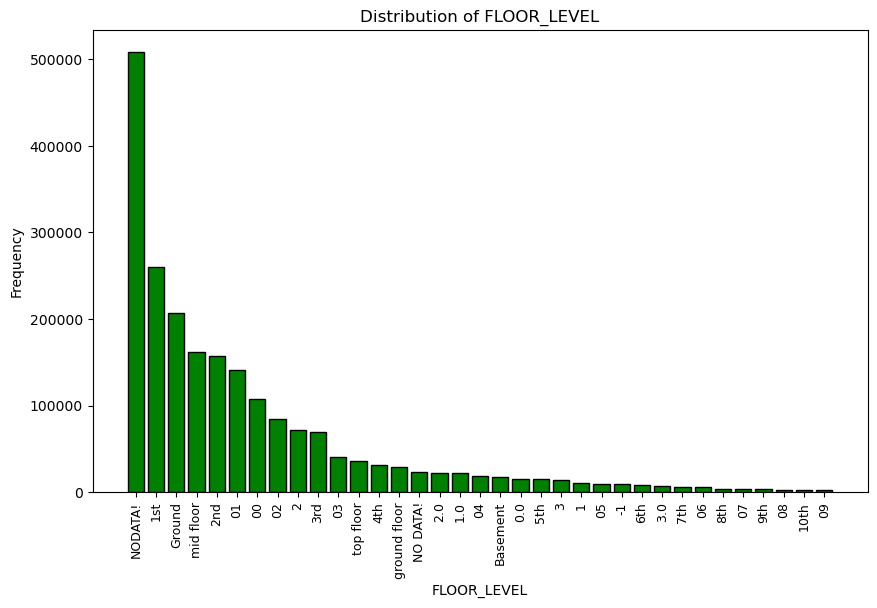

In [17]:
plot_categorical(dom_df,column='FLOOR_LEVEL')

In [28]:
drop2=['FLOOR_LEVEL']
dom_df.drop(columns=drop2, inplace=True)#SINCE ALL OF THE SERIES ARE NAN so we remove this column

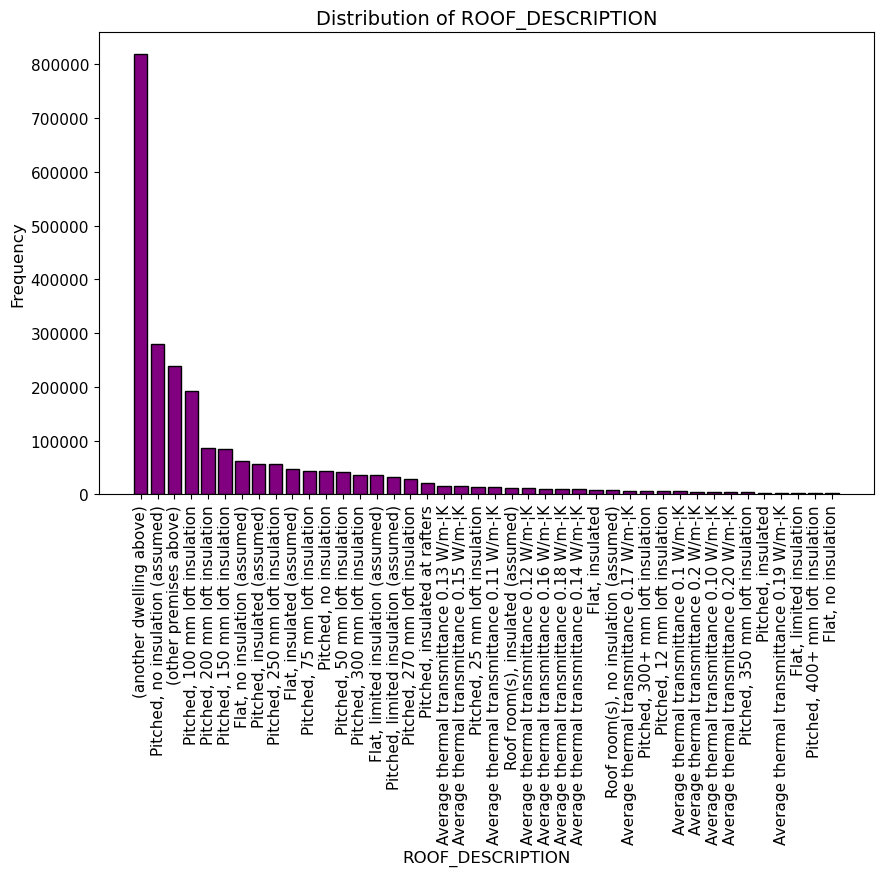

In [13]:
plot_categorical(dom_df,column='ROOF_DESCRIPTION')

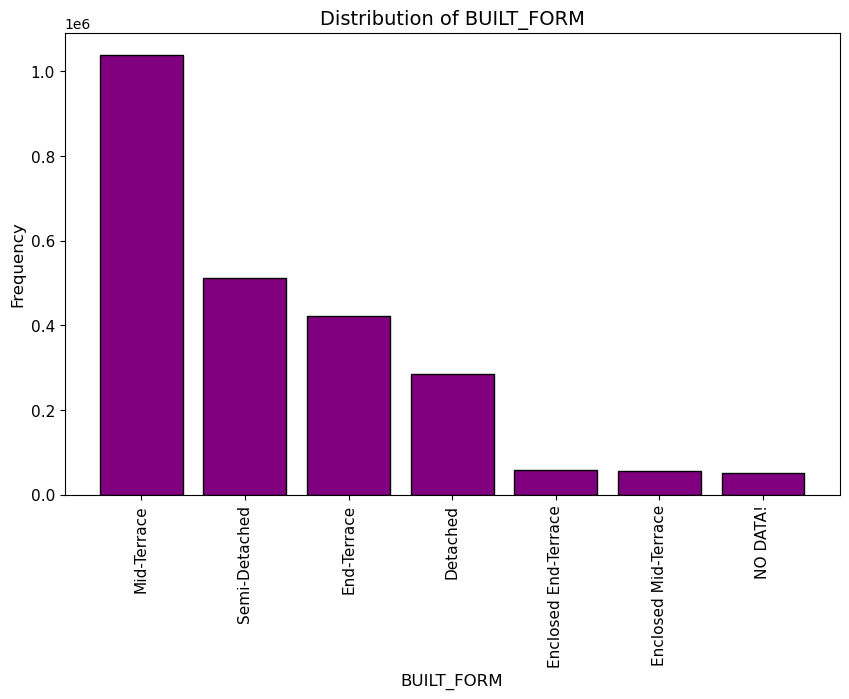

In [15]:
plot_categorical(dom_df,column='BUILT_FORM')

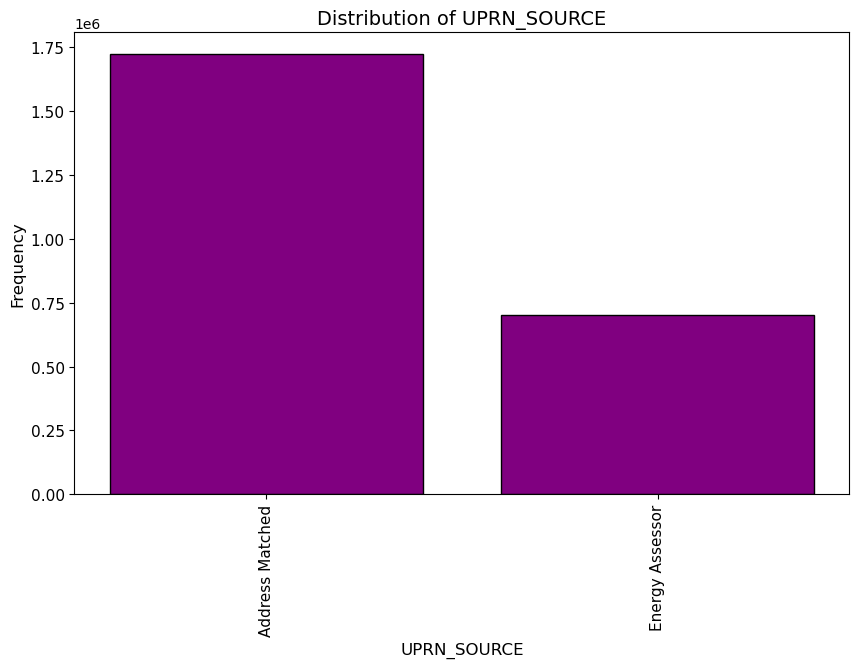

In [17]:
plot_categorical(dom_df,column='UPRN_SOURCE')

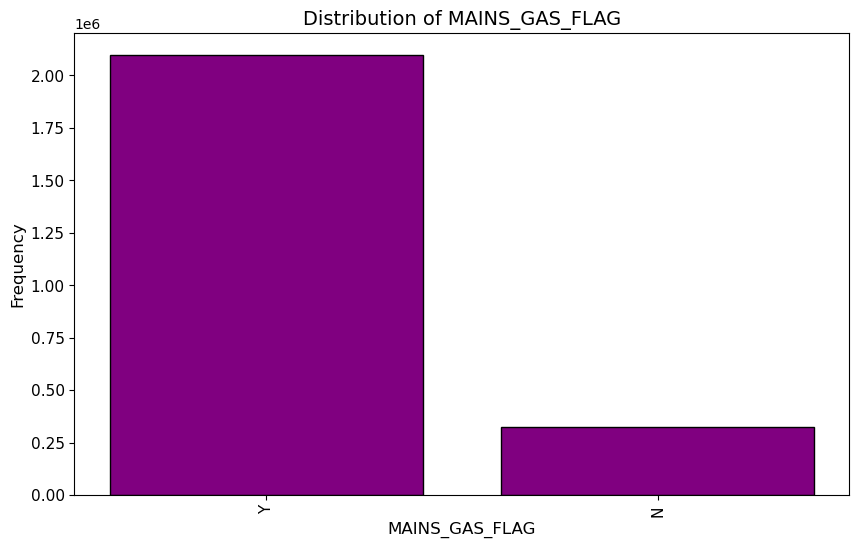

In [19]:
plot_categorical(dom_df,column='MAINS_GAS_FLAG')

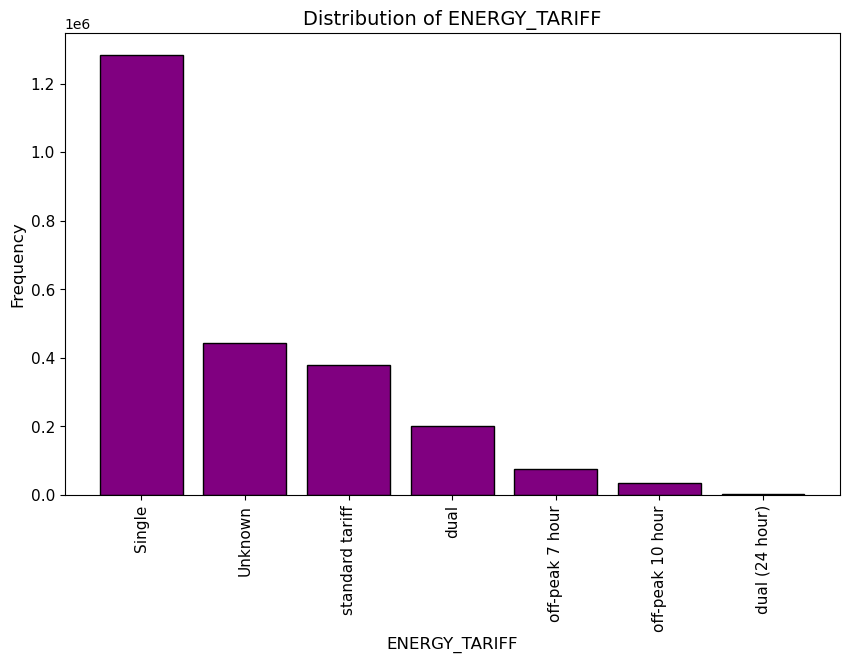

In [21]:
plot_categorical(dom_df,column='ENERGY_TARIFF')

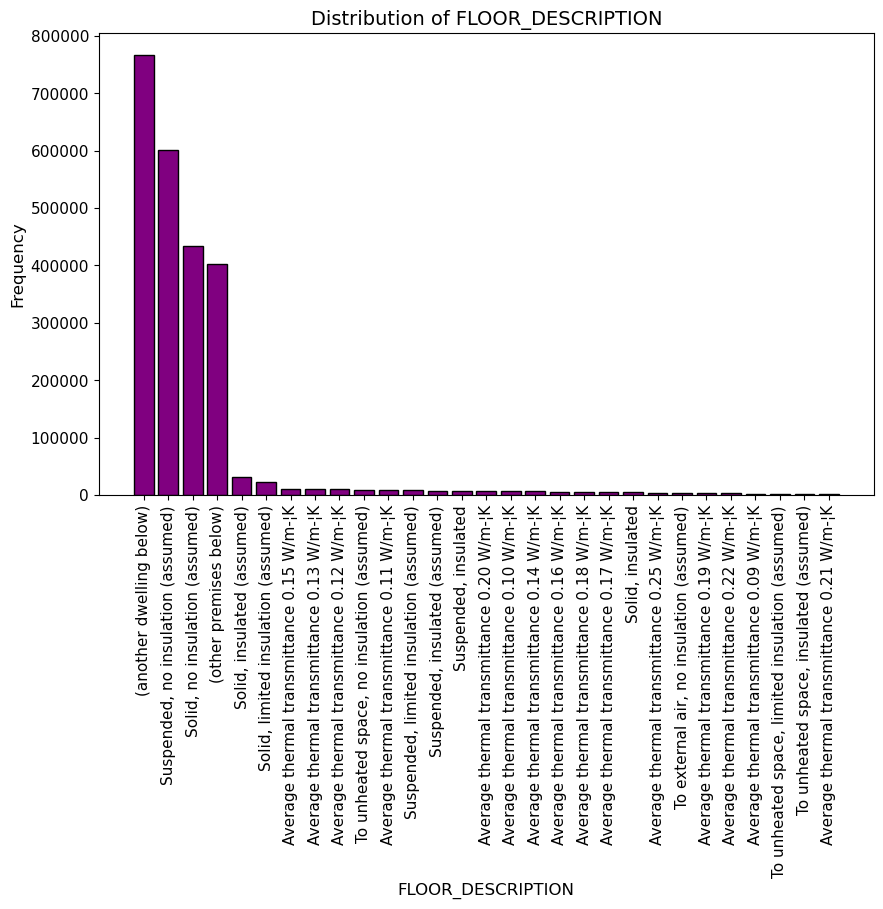

In [23]:
plot_categorical(dom_df,column='FLOOR_DESCRIPTION')

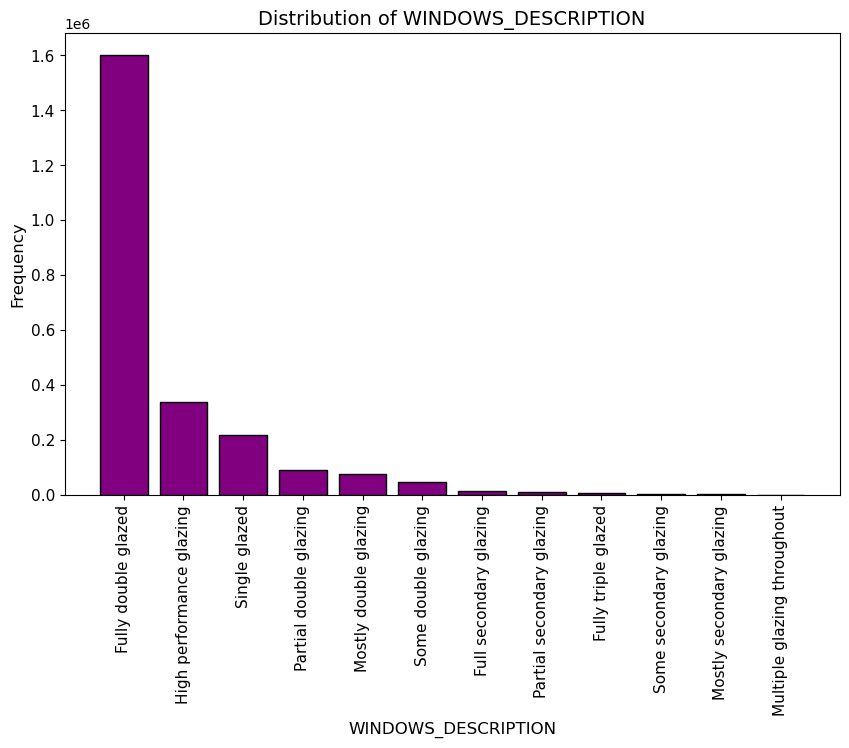

In [25]:
plot_categorical(dom_df,column='WINDOWS_DESCRIPTION')

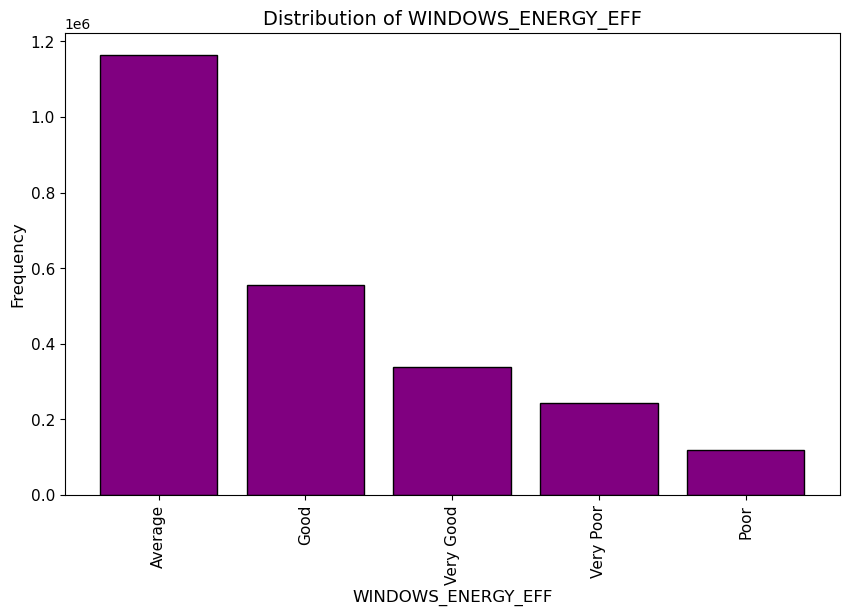

In [27]:
plot_categorical(dom_df,column='WINDOWS_ENERGY_EFF')

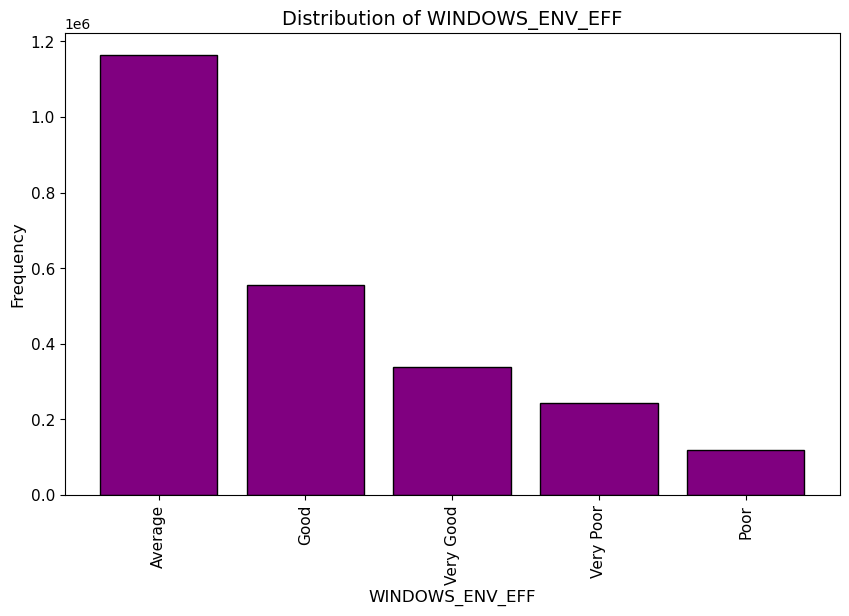

In [29]:
plot_categorical(dom_df,column='WINDOWS_ENV_EFF')

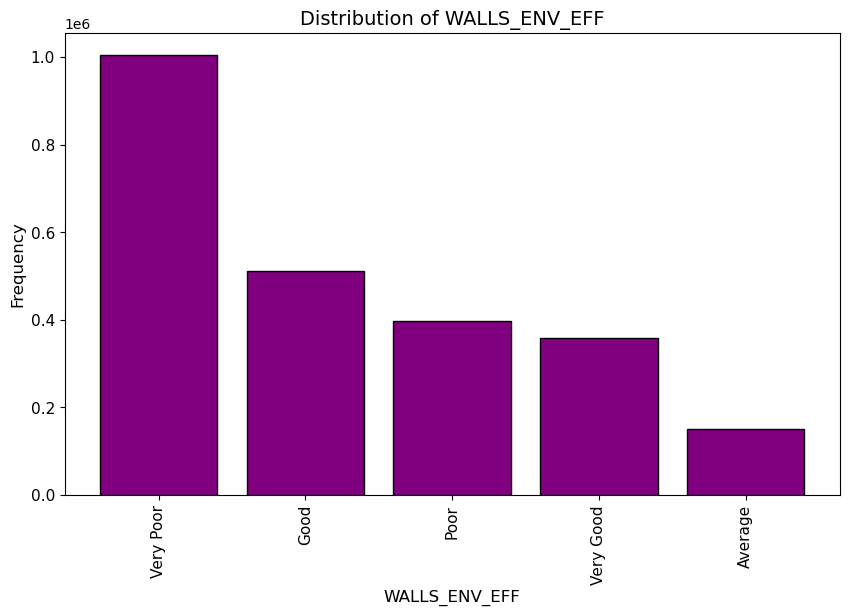

In [31]:
plot_categorical(dom_df,column='WALLS_ENV_EFF')

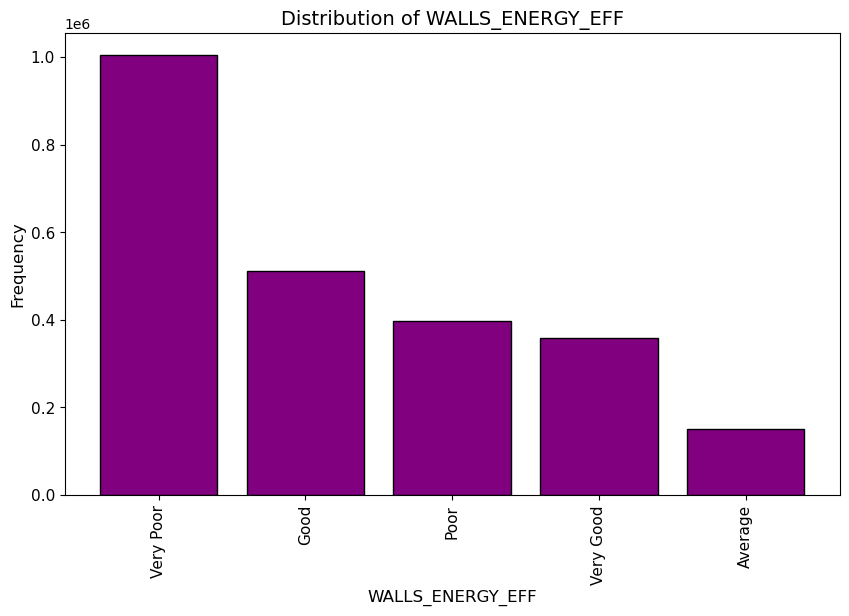

In [33]:
plot_categorical(dom_df,column='WALLS_ENERGY_EFF')

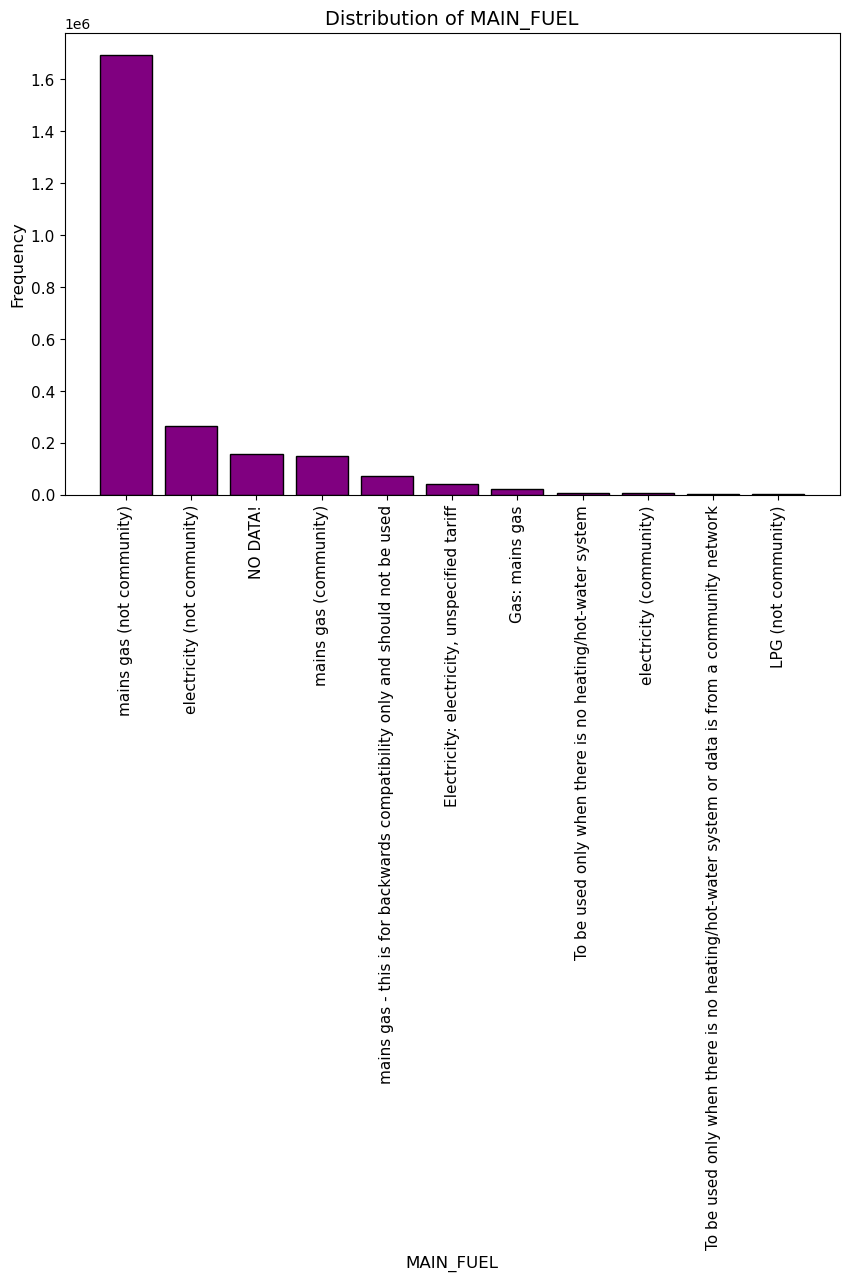

In [35]:
plot_categorical(dom_df,column='MAIN_FUEL')

In [37]:
dom_df['CONSTRUCTION_AGE_BAND'].value_counts().idxmax()


'England and Wales: 1900-1929'

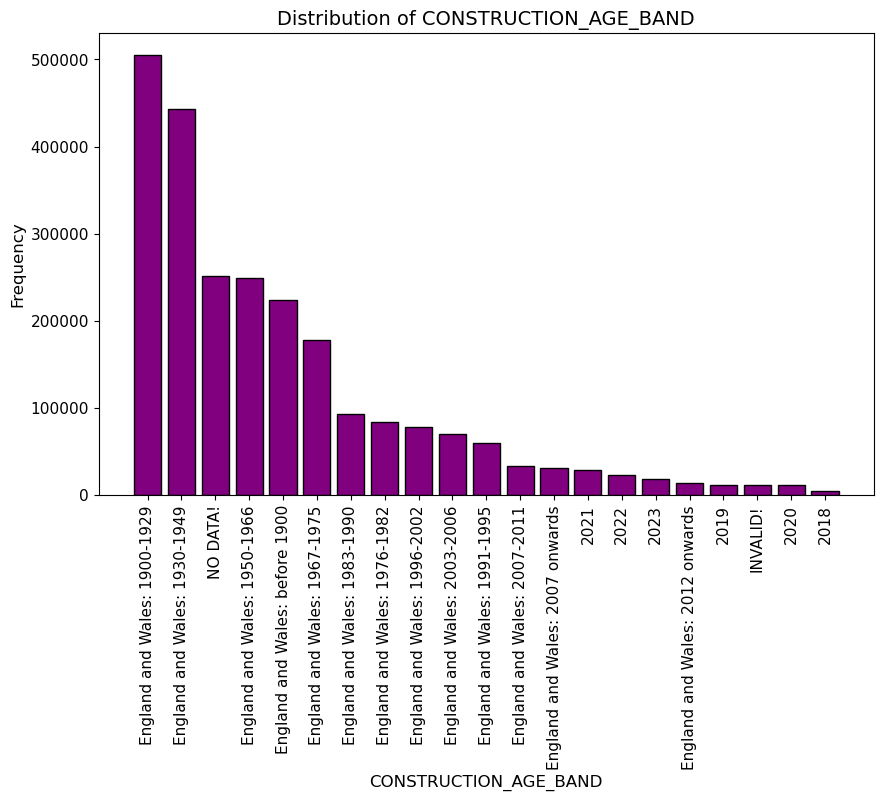

In [39]:
plot_categorical(dom_df,column='CONSTRUCTION_AGE_BAND')

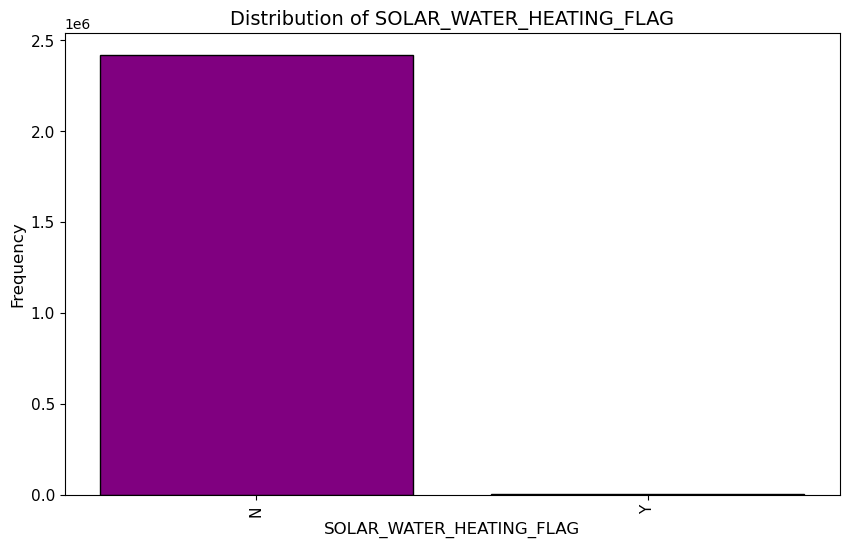

In [41]:
plot_categorical(dom_df,column='SOLAR_WATER_HEATING_FLAG')

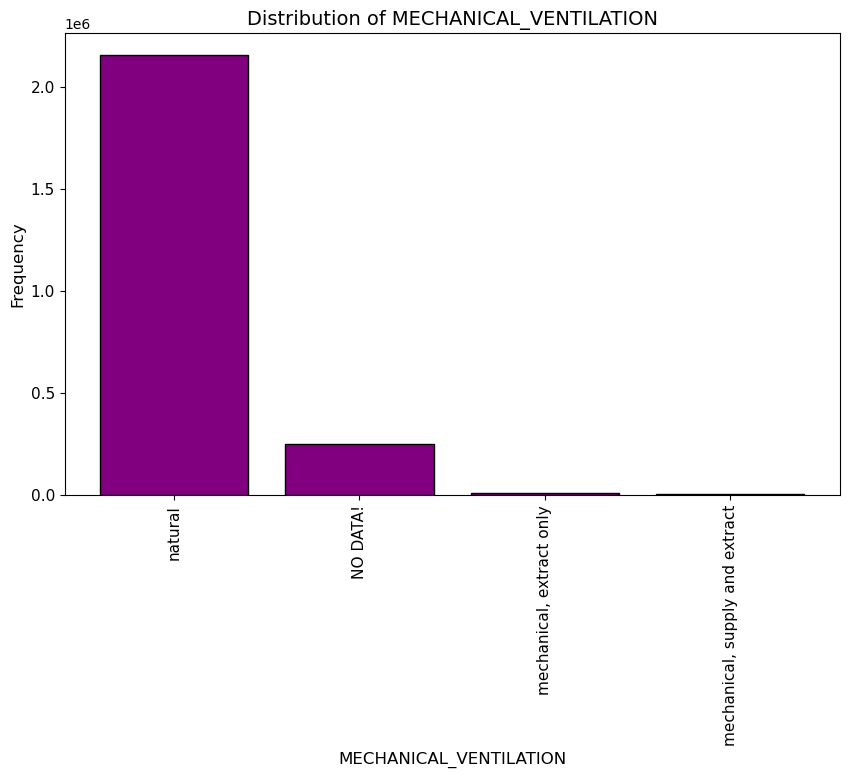

In [43]:
plot_categorical(dom_df,column='MECHANICAL_VENTILATION')

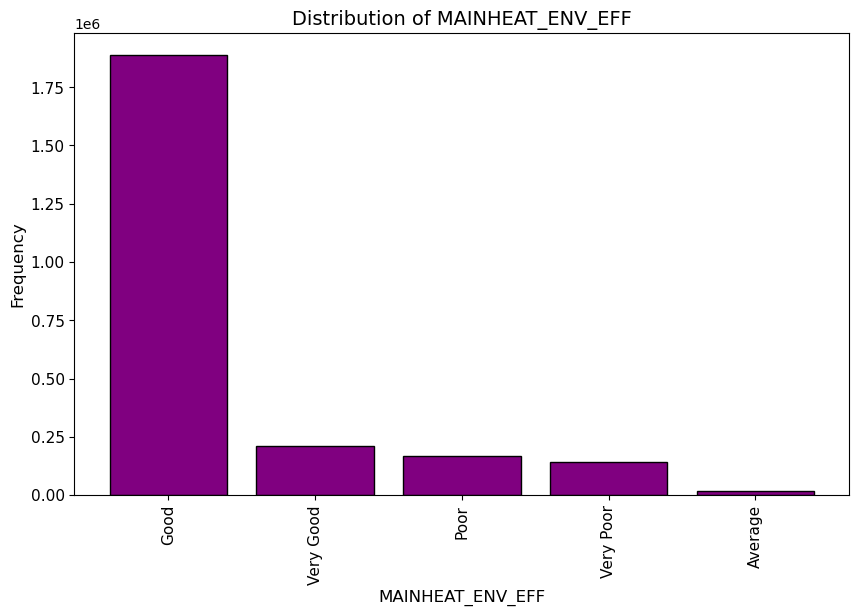

In [45]:
plot_categorical(dom_df,column='MAINHEAT_ENV_EFF')

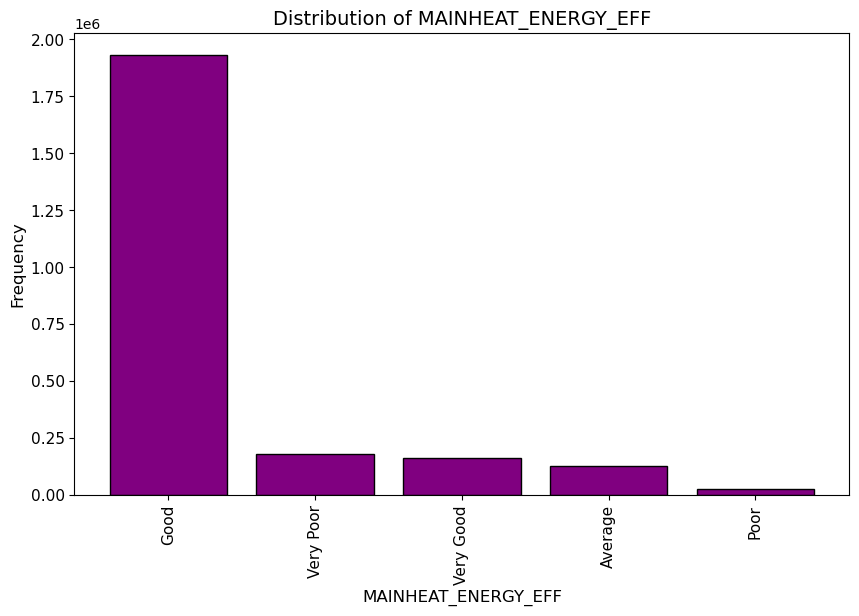

In [47]:
plot_categorical(dom_df,column='MAINHEAT_ENERGY_EFF')

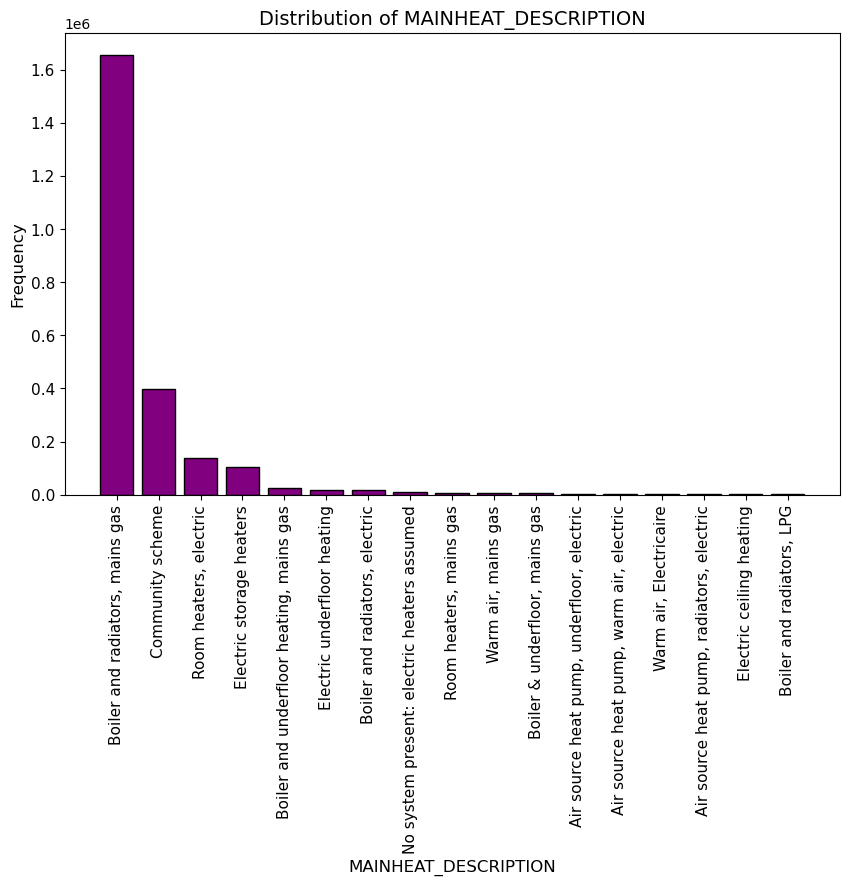

In [49]:
plot_categorical(dom_df,column='MAINHEAT_DESCRIPTION')

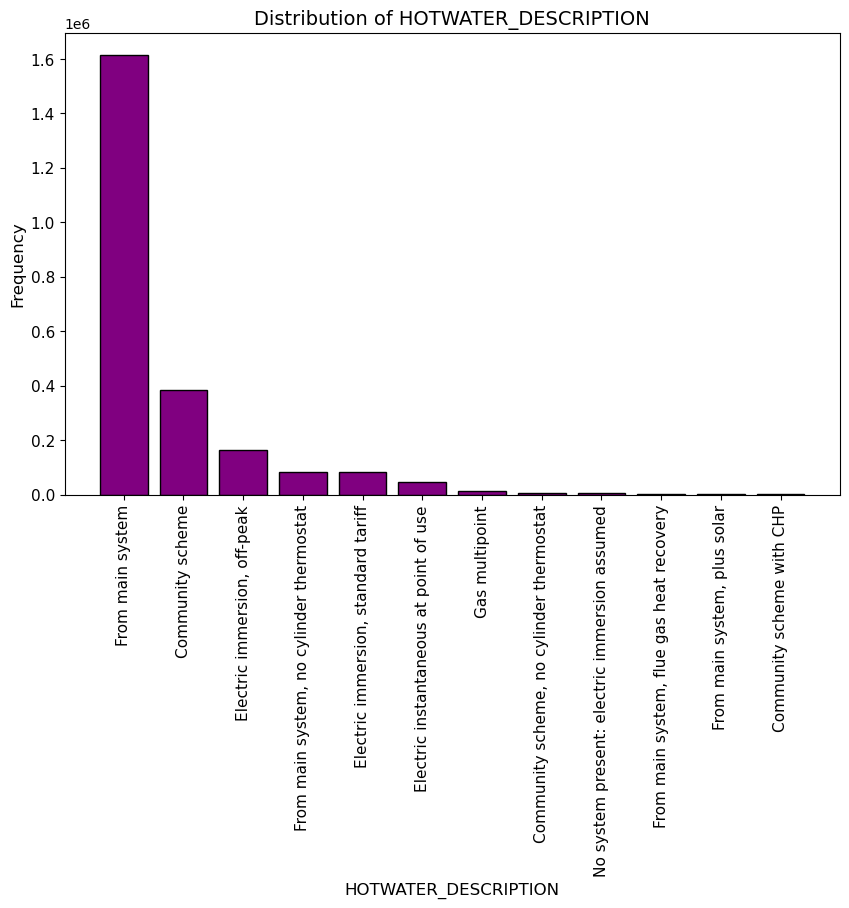

In [51]:
plot_categorical(dom_df,column='HOTWATER_DESCRIPTION')

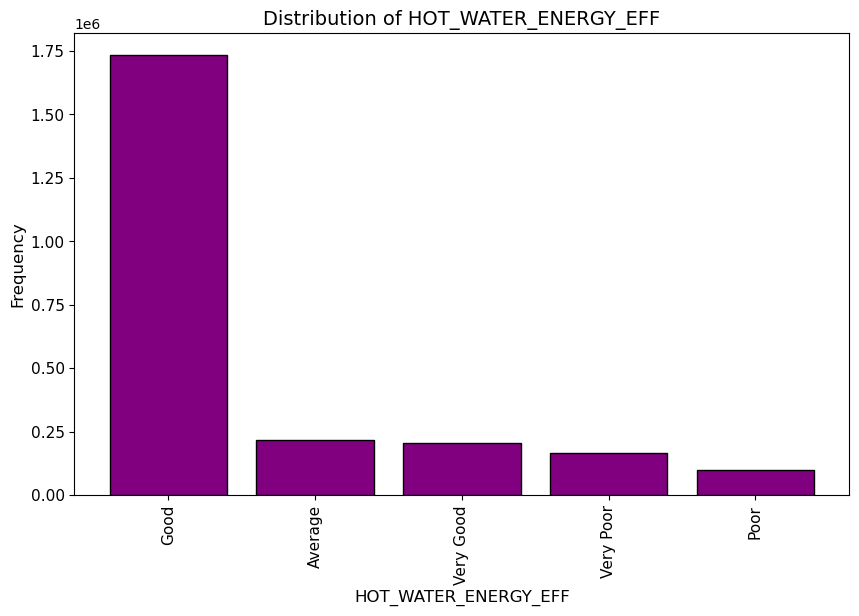

In [53]:
plot_categorical(dom_df,column='HOT_WATER_ENERGY_EFF')

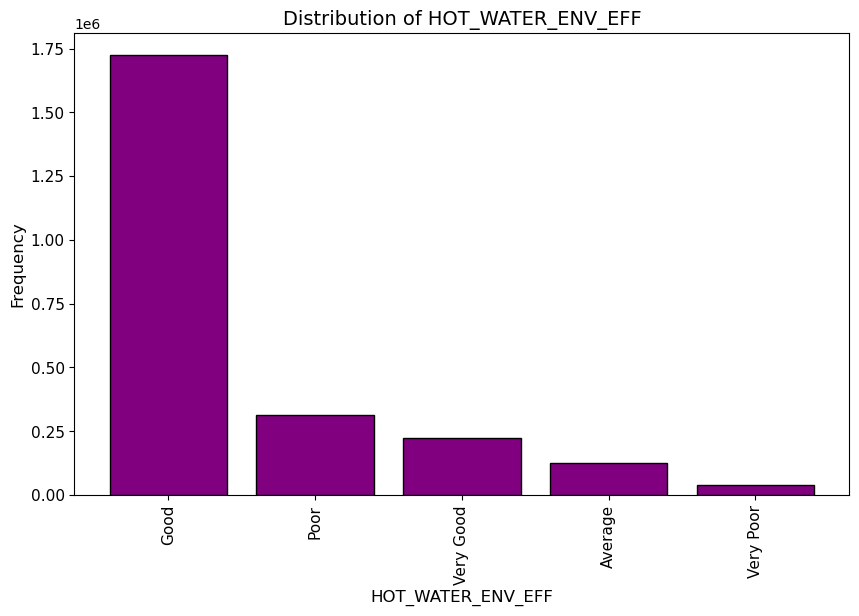

In [55]:
plot_categorical(dom_df,column='HOT_WATER_ENV_EFF')

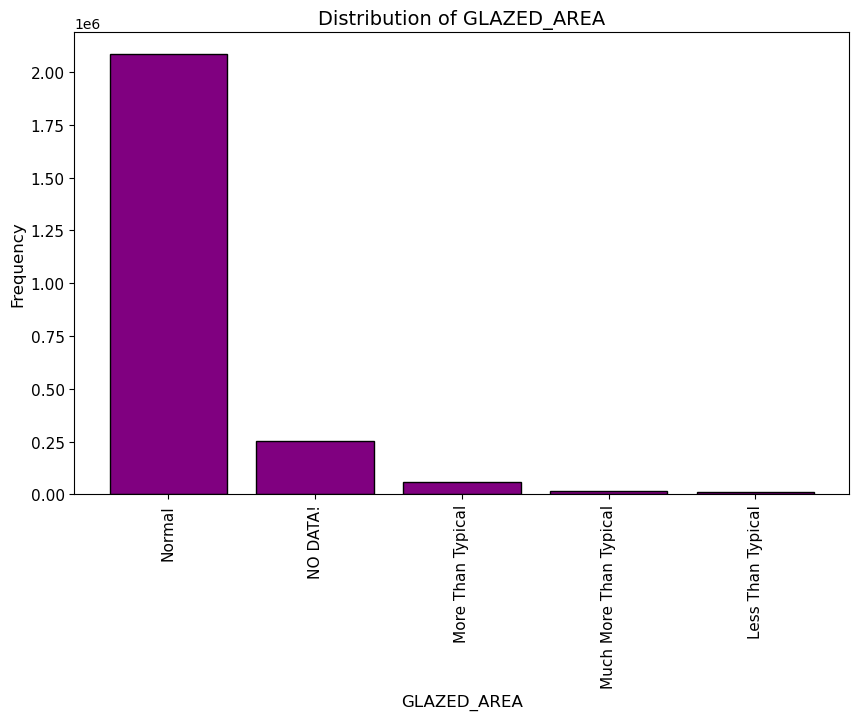

In [57]:
plot_categorical(dom_df,column='GLAZED_AREA')

In [58]:
dom_df['EXTENSION_COUNT'].value_counts()#.idxmax()
#dom_df['EXTENSION_COUNT']= dom_df['EXTENSION_COUNT'].replace(np.nan, "Good")

EXTENSION_COUNT
0.0    1485761
1.0     427986
2.0     105781
3.0      24010
4.0       7386
Name: count, dtype: int64

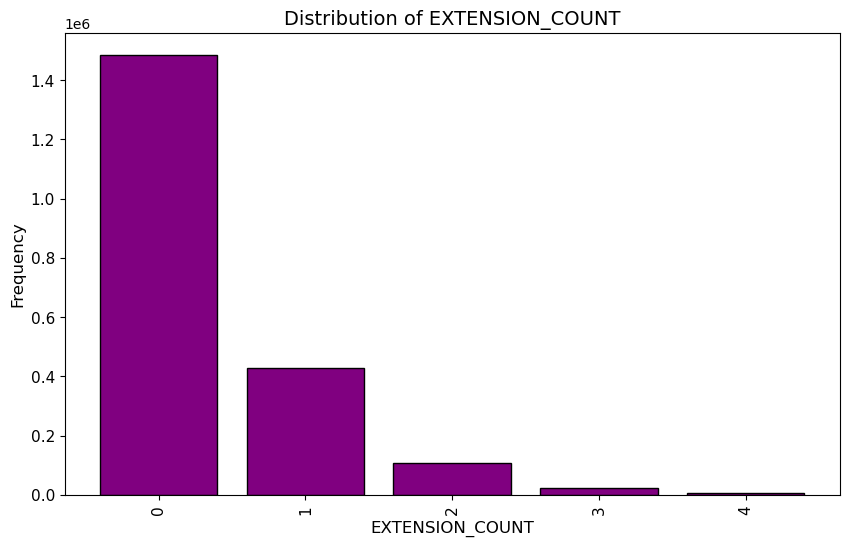

In [59]:
plot_categorical(dom_df,column='EXTENSION_COUNT')

In [37]:
def median(df, feature):
    
    # Calculate the median and replace the NAN values from original dataframe
    med = df[feature].median()
    df.loc[:, feature] = df[feature].fillna(med)
    
    return df

In [62]:
dom_df = median(dom_df, 'EXTENSION_COUNT')#Since the range is not too big so we dont do binning so we can choose either to 
#fill with mean ore median in this case i choose median to avoid any data skewed distribution

### 2.3  Data Binning Techniques [^](#index) <a name="2.3"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
Below are the list of feature for binning:

1. NUMBER_HABITABLE_ROOMS
2. NUMBER_HEATED_ROOMS

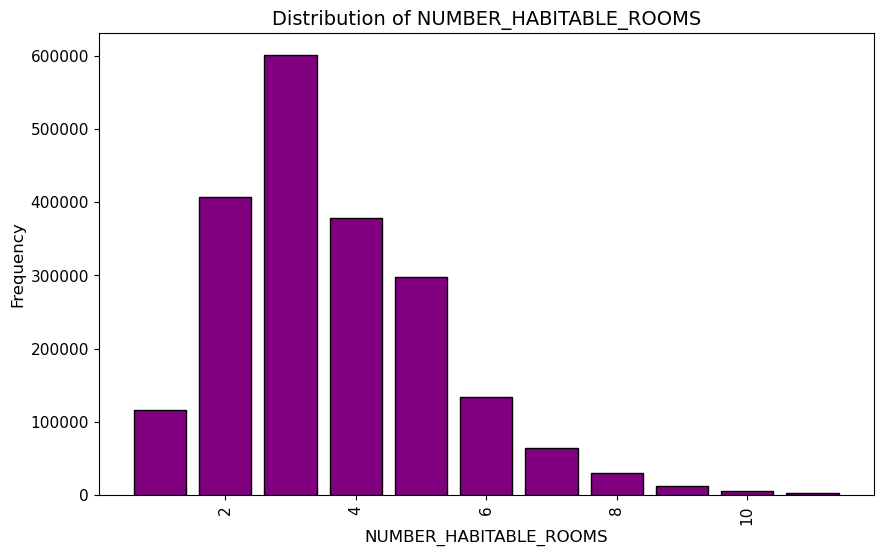

In [63]:
plot_categorical(dom_df,column='NUMBER_HABITABLE_ROOMS')

In [29]:
dom_df['NUMBER_HABITABLE_ROOMS']=np.random.randint(1.0,200,len(dom_df))
max_Num_HR=max(dom_df['NUMBER_HABITABLE_ROOMS'])
max_Num_HR

199

<Axes: ylabel='NUMBER_HABITABLE_ROOMS_bin'>

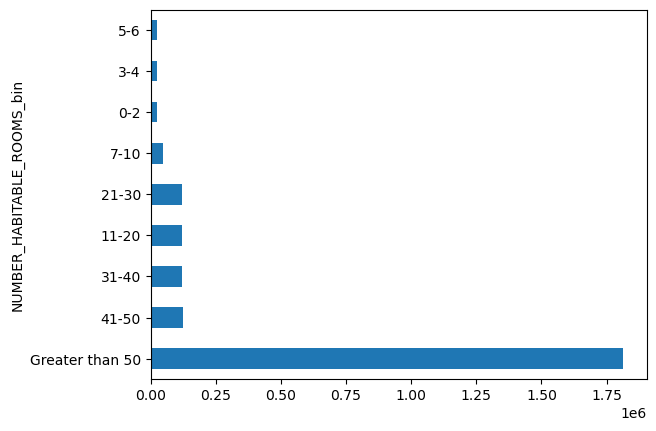

In [30]:
bins=[0, 2, 4, 6, 10, 20, 30, 40, 50,max_Num_HR]
category=['0-2', '3-4', '5-6', '7-10', '11-20', '21-30', '31-40', '41-50', 'Greater than 50']
dom_df['NUMBER_HABITABLE_ROOMS_bin']=pd.cut(dom_df['NUMBER_HABITABLE_ROOMS'],bins=bins,labels=category)
dom_df['NUMBER_HABITABLE_ROOMS_bin'].value_counts().plot(kind='barh')

In [31]:
dom_df = median(dom_df, 'NUMBER_HABITABLE_ROOMS')

NameError: name 'median' is not defined

In [32]:
dom_df['NUMBER_HEATED_ROOMS'].value_counts()#.idxmax()

NUMBER_HEATED_ROOMS
3.0     597523
2.0     408409
4.0     375045
5.0     290637
6.0     130244
1.0     124307
7.0      62353
8.0      28783
9.0      12447
0.0      10021
10.0      5597
11.0      2510
12.0      1325
13.0       593
14.0       393
15.0       227
16.0       150
17.0        77
18.0        71
20.0        47
19.0        37
21.0        26
23.0        16
22.0        16
30.0         9
24.0         9
28.0         6
26.0         5
34.0         4
25.0         4
40.0         3
29.0         3
44.0         3
90.0         3
27.0         3
31.0         2
32.0         2
38.0         1
36.0         1
85.0         1
57.0         1
67.0         1
53.0         1
33.0         1
60.0         1
56.0         1
46.0         1
41.0         1
66.0         1
37.0         1
43.0         1
Name: count, dtype: int64

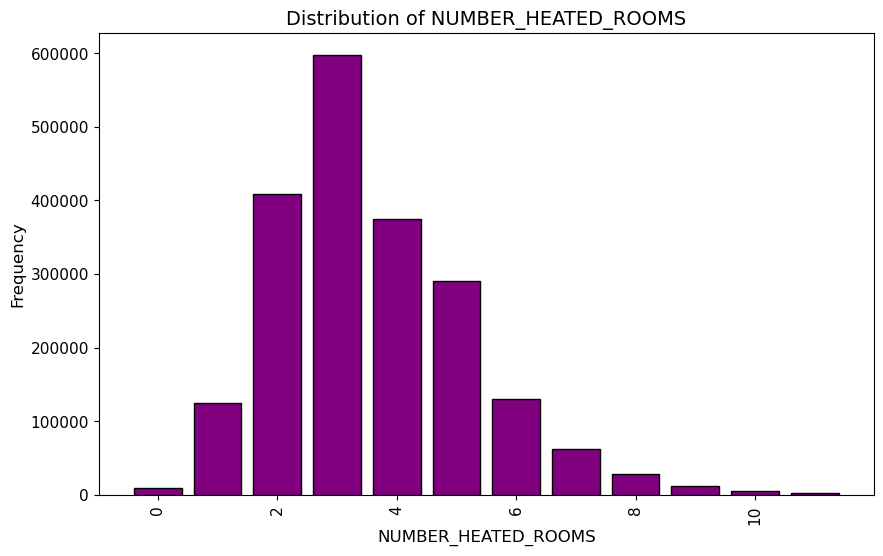

In [33]:
plot_categorical(dom_df,column='NUMBER_HEATED_ROOMS')

In [34]:
dom_df['NUMBER_HEATED_ROOMS']=np.random.randint(1.0,200,len(dom_df))
max_Num_Heated=max(dom_df['NUMBER_HEATED_ROOMS'])
max_Num_Heated

199

<Axes: ylabel='NUMBER_HEATED_ROOMS_bin'>

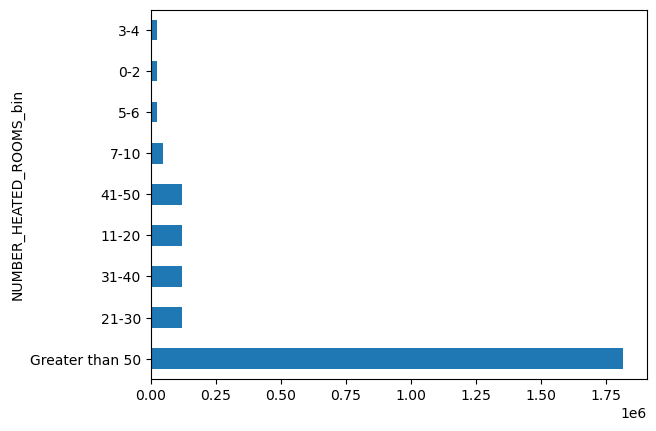

In [35]:
bin1=[0, 2, 4, 6, 10, 20, 30, 40, 50,max_Num_Heated]
category1=['0-2', '3-4', '5-6', '7-10', '11-20', '21-30', '31-40', '41-50', 'Greater than 50']
dom_df['NUMBER_HEATED_ROOMS_bin']=pd.cut(dom_df['NUMBER_HEATED_ROOMS'],bins=bin1,labels=category1)
dom_df['NUMBER_HEATED_ROOMS_bin'].value_counts().plot(kind='barh')

In [36]:
dom_df = median(dom_df, 'NUMBER_HEATED_ROOMS')

NameError: name 'median' is not defined

# 3. Conclusion [^](#index) <a name="3"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;To sum up, seven features are dropped from the EPC since the NAN values are more than 20%. 
The features are Roof Environment Efficiency, Roof Energy Efficiency, Unheated Corridor Length, 
Floor Height, Address 3 and Address 2.Moreover, for discrete data type, the data is binned
and the NAN values are replaced using the median function and grouped into few categories.
For EPC, Number of Habitable Rooms and Number of Heated Rooms are pre-processed using the binning techniques.
<div>

In [72]:
dom_df.isnull().sum()

LMK_KEY                               0
ADDRESS1                              0
BUILDING_REFERENCE_NUMBER             0
POSTCODE                              0
TENURE                                0
UPRN                             125223
UPRN_SOURCE                           0
PROPERTY_TYPE                         0
BUILT_FORM                            0
year                                  0
INSPECTION_DATE                       0
CO2_EMISSIONS_CURRENT                 0
CURRENT_ENERGY_RATING                 0
CURRENT_ENERGY_EFFICIENCY             0
ENERGY_CONSUMPTION_CURRENT            0
CO2_EMISS_CURR_PER_FLOOR_AREA         0
TOTAL_FLOOR_AREA                      0
ENERGY_TARIFF                         0
MAINS_GAS_FLAG                        0
MULTI_GLAZE_PROPORTION                0
TRANSACTION_TYPE                      0
GLAZED_AREA                           0
EXTENSION_COUNT                       0
NUMBER_HABITABLE_ROOMS                0
NUMBER_HEATED_ROOMS                   0


In [116]:
dom_df['MAINHEATC_ENV_EFF'].value_counts()#Drop this as it is a copy for  MAINHEAT_ENV_EFF is the same

MAINHEATC_ENV_EFF
Good         1374165
Average       646767
Poor          164623
Very Poor     147830
Very Good      89166
Name: count, dtype: int64

In [117]:
dom_df['MAINHEAT_ENV_EFF'].value_counts()

MAINHEAT_ENV_EFF
Good         1888104
Very Good     210152
Poor          166001
Very Poor     141650
Average        16643
Name: count, dtype: int64

In [73]:
drop3=['MAINHEATC_ENV_EFF']
dom_df.drop(columns=drop3, inplace=True)

In [139]:
dom_df

,LMK_KEY,ADDRESS1,BUILDING_REFERENCE_NUMBER,POSTCODE,TENURE,UPRN,UPRN_SOURCE,PROPERTY_TYPE,BUILT_FORM,year,...,LIGHTING_ENERGY_EFF,LIGHTING_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENV_EFF,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,HEATING_COST_CURRENT,LIGHTING_COST_CURRENT
0,20e1bbd4c3e619b7d333af256de02e44169ee228a297f5...,209a Green Street,10003607682,E7 8LL,Rented (private),1.000899e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,Very Good,Low energy lighting in all fixed outlets,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,374.0,47.0
1,188af6dacb4137e02fd8964966ec981f4c3f5c4ea6b700...,Flat 97,10003516387,E15 2GB,Rented (private),1.009033e+10,Energy Assessor,Flat,Semi-Detached,2022.0,...,Very Good,Low energy lighting in 79% of fixed outlets,Good,Community scheme,Good,Community scheme,Good,Good,258.0,119.0
2,189637da5cc47f86d824c37663194e1f2a28e3ee5654b1...,34 Mitcham Road,10003448733,E6 3LU,Rented (private),4.605080e+07,Energy Assessor,House,End-Terrace,2022.0,...,Very Good,Low energy lighting in all fixed outlets,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,675.0,84.0
3,1897b2921445e4861204269cd4cd66bf7aabb8c3a79b52...,Flat 35,10003510192,E15 3LE,Rented (social),4.604471e+07,Energy Assessor,Flat,End-Terrace,2022.0,...,Very Good,Low energy lighting in 75% of fixed outlets,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,297.0,70.0
4,189c0e87dc613023b1a9e42416645b96333e2893ae2371...,Flat 42,10003511750,E16 4LX,Owner-occupied,1.000901e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,Good,Low energy lighting in 60% of fixed outlets,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,289.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422546,010999bf35108420464e5ea48e40b9a624492ceae6e69d...,Flat 9,10002935381,IG6 1RA,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,2022.0,...,Very Poor,No low energy lighting,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,311.0,101.0
2422547,00fede183e28ba0b6e3868de003f227fdfa0a7b616c0ba...,251 Maybank Road,10002733331,E18 1ER,Owner-occupied,1.000223e+11,Energy Assessor,House,Semi-Detached,2022.0,...,Very Good,Low energy lighting in all fixed outlets,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,676.0,65.0
2422548,00cad7ab89e5159a0864b4de6e2faad8e2c07307ad9c3b...,29c Grosvenor Road,10002617564,E11 2EW,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,2022.0,...,Very Good,Low energy lighting in all fixed outlets,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,405.0,44.0
2422549,006da7fc42ee9e7c3c8d023ad6eadda2a506fc1e811a1c...,18 Palmer Road,10002625957,RM8 1TD,Owner-occupied,1.000222e+11,Energy Assessor,House,Mid-Terrace,2022.0,...,Very Good,Low energy lighting in all fixed outlets,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,263.0,53.0


In [140]:
dom_df.columns

Index(['LMK_KEY', 'ADDRESS1', 'BUILDING_REFERENCE_NUMBER', 'POSTCODE',
       'TENURE', 'UPRN', 'UPRN_SOURCE', 'PROPERTY_TYPE', 'BUILT_FORM', 'year',
       'INSPECTION_DATE', 'CO2_EMISSIONS_CURRENT', 'CURRENT_ENERGY_RATING',
       'CURRENT_ENERGY_EFFICIENCY', 'ENERGY_CONSUMPTION_CURRENT',
       'CO2_EMISS_CURR_PER_FLOOR_AREA', 'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF',
       'MAINS_GAS_FLAG', 'MULTI_GLAZE_PROPORTION', 'TRANSACTION_TYPE',
       'GLAZED_AREA', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION',
       'WINDOWS_ENERGY_EFF', 'WINDOWS_ENV_EFF', 'WALLS_DESCRIPTION',
       'WALLS_ENERGY_EFF', 'WALLS_ENV_EFF', 'ROOF_DESCRIPTION', 'MAIN_FUEL',
       'CONSTRUCTION_AGE_BAND', 'ENVIRONMENT_IMPACT_CURRENT',
       'SOLAR_WATER_HEATING_FLAG', 'MECHANICAL_VENTILATION',
       'LIGHTING_ENV_EFF', 'LIGHTING_ENERGY_EFF', 'LIGHTING_DESCRIPTION',
       'MAINHEAT_ENERGY_EFF', 'MAINHEAT_DESCRIPTION', 'MAINHEAT_ENV_EFF',
  

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
Finally, we save our cleaned data from EPC data with total of 2.4 million rows and 49 features.

In [38]:
dom_df.to_csv('1.1_Dom_1423_EPC_NAN Categorical.csv',index=False)

# 4. References [^](#4) <a name="4"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">

[1] Energy Performance Certificate Register. (n.d.). Domestic Energy Performance Certificates search. Open Data Communities. Retrieved [August 30, 2024], from  
https://epc.opendatacommunities.org/domestic/search

[2] Steadman, P., Evans, S., Liddiard, R., Godoy-Shimizu, D., Ruyssevelt, P., & Humphrey, D. (2020). Building stock energy modelling in the UK: The 3DStock method and the London Building Stock Model. *Buildings and Cities, 1*(1), 100–119. https://doi.org/10.5334/bc.52
</div>
